### Sentiment Analysis – Take home Assignment
#### Date : 17/05/2023
#### Index No: SE/2017/041

In [155]:
import pandas as pd
import nltk
import re #regex

#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split

#model
from sklearn.naive_bayes import MultinomialNB

#evaluation metrics
from sklearn import metrics

#stemming
from nltk.stem import PorterStemmer

#Lemmatizer
from nltk.stem import WordNetLemmatizer

#stopwords
from nltk.corpus import stopwords

# pandas and numpy
import pandas as pd
import numpy as np


#import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

#import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#tokernizers
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

#classification results
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, classification_report

#import logistic regression 
from sklearn.linear_model import LogisticRegression

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt

## (a) Use the IMDB movie reviews dataset provided. Read the csv data file to a Pandas dataframe and take a sample of 10,000 reviews as your main dataset used for Sentiment Analysis. Use stratified  sampling to ensure that the classes are balanced. Clean the data in appropriate ways. Print the number of reviews which are positive and the number that are negative in order to gauge the dimensions of the dataset

In [156]:
#Loading the Dataset
review_data = pd.read_csv('IMDB Dataset.csv')

In [157]:
#Perform stratified sampling
X = review_data['review']
y = review_data['sentiment']
X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=10000, stratify=y, random_state=42)

data = pd.DataFrame({'review': X_sampled, 'sentiment': y_sampled})



In [158]:
data.head()

,review,sentiment
16818,This was obviously the worst movie ever made.....,negative
45363,Fame did something odd. It was not only a musi...,negative
8101,"From all the rave reviews, we couldn't wait to...",negative
23754,"First, let me confess that I have not read thi...",positive
3216,Mickey Rourke is enjoying a renaissance at the...,negative


In [159]:
#row and coloumn count
data.shape

(10000, 2)

In [160]:
#Clean the data
def clean_text(text):
    
    # Remove HTML tags
    text = re.sub(r'<br />', ' ', text)  
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)  
    
    # Convert text to lowercase
    text = text.lower()

    return text

In [161]:
data['review'] = data['review'].apply(clean_text)
data.head()

,review,sentiment
16818,this was obviously the worst movie ever made ...,negative
45363,fame did something odd it was not only a musi...,negative
8101,from all the rave reviews we couldn t wait to...,negative
23754,first let me confess that i have not read thi...,positive
3216,mickey rourke is enjoying a renaissance at the...,negative


In [162]:
# count of the negative and positive sentiments
data['sentiment'].value_counts()

negative    5000
positive    5000
Name: sentiment, dtype: int64

## (b) Create bag-of-words and TF-IDF representations of the reviews in the main-dataset above and use two relevant supervised learning algorithms to classify future reviews according to their sentiment. Print the confusion matrices of the four (04) resulting combinations for a held-out (test) dataset. (Split the data into training and testing sets, using 80% of the data for training and the rest for testing.)

In [163]:
# Create bag-of-words and TF-IDF representations
vectorizer_bow = CountVectorizer()
vectorizer_tfidf = TfidfVectorizer()

X_bow = vectorizer_bow.fit_transform(data['review'])
X_tfidf = vectorizer_tfidf.fit_transform(data['review'])
y = data['sentiment']

In [164]:
# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Print the class distribution in the training set
print("Training Set Class Distribution:")
print(y_train.value_counts())

# Print the class distribution in the testing set
print("\nTesting Set Class Distribution:")
print(y_test.value_counts())

Training Set Class Distribution:
negative    4000
positive    4000
Name: sentiment, dtype: int64

Testing Set Class Distribution:
positive    1000
negative    1000
Name: sentiment, dtype: int64


In [165]:
# Train and evaluate classifiers
nb_bow = MultinomialNB()
nb_tfidf = MultinomialNB()
lr_bow = LogisticRegression()
lr_tfidf = LogisticRegression()

nb_bow.fit(X_train_bow, y_train)
nb_tfidf.fit(X_train_tfidf, y_train)
lr_bow.fit(X_train_bow, y_train)
lr_tfidf.fit(X_train_tfidf, y_train)

C:\Users\S.Sivanujan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Confusion Matrix - Naive Bayes with Bag-of-Words:
[[871 129]
 [196 804]]


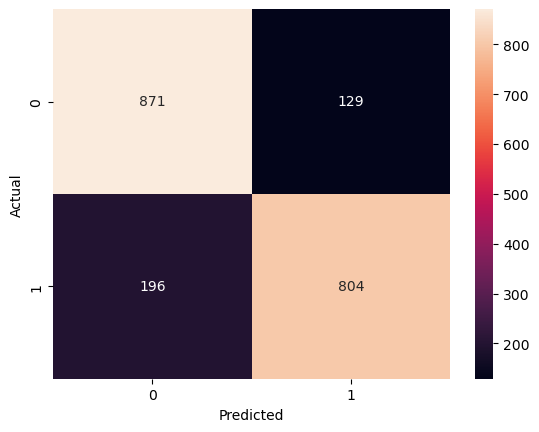


Confusion Matrix - Naive Bayes with TF-IDF:
[[906  94]
 [214 786]]


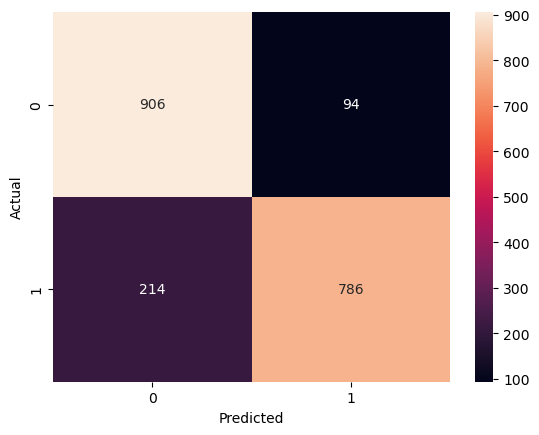


Confusion Matrix - Logistic Regression with Bag-of-Words:
[[841 159]
 [123 877]]


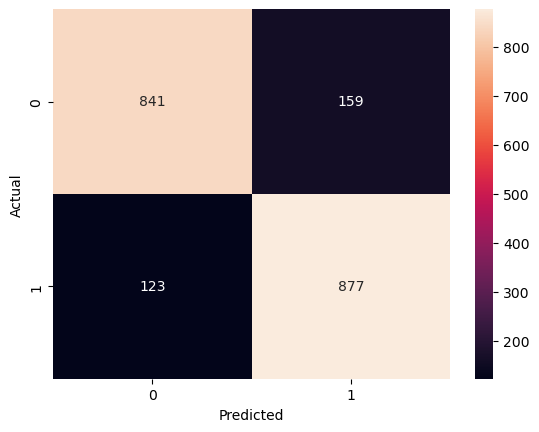


Confusion Matrix - Logistic Regression with TF-IDF:
[[847 153]
 [104 896]]


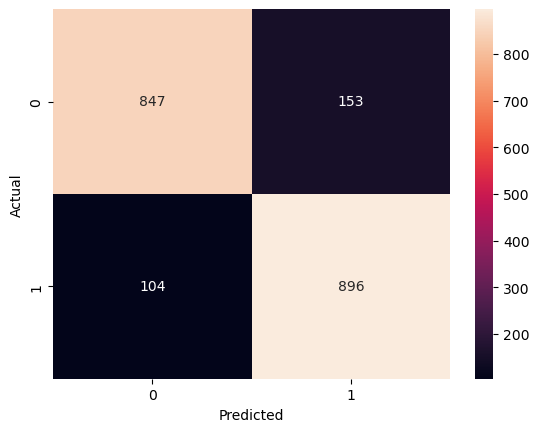

In [166]:
# Print the confusion matrices for the four resulting combinations
y_pred_nb_bow = nb_bow.predict(X_test_bow)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
y_pred_lr_bow = lr_bow.predict(X_test_bow)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

confusion_nb_bow = confusion_matrix(y_test, y_pred_nb_bow)
confusion_nb_tfidf = confusion_matrix(y_test, y_pred_nb_tfidf)
confusion_lr_bow = confusion_matrix(y_test, y_pred_lr_bow)
confusion_lr_tfidf = confusion_matrix(y_test, y_pred_lr_tfidf)

print("Confusion Matrix - Naive Bayes with Bag-of-Words:")
print(confusion_nb_bow)

#confusion matrix visualization
sns.heatmap(confusion_nb_bow,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nConfusion Matrix - Naive Bayes with TF-IDF:")
print(confusion_nb_tfidf)

#confusion matrix visualization
sns.heatmap(confusion_nb_tfidf,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


print("\nConfusion Matrix - Logistic Regression with Bag-of-Words:")
print(confusion_lr_bow)

#confusion matrix visualization
sns.heatmap(confusion_lr_bow,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nConfusion Matrix - Logistic Regression with TF-IDF:")
print(confusion_lr_tfidf)

#confusion matrix visualization
sns.heatmap(confusion_lr_tfidf,annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [167]:

#Classification Report
print("\nClassification Report - Naive Bayes with Bag-of-Words:")
print(classification_report(y_test, y_pred_nb_bow))

print("Performance Metrics - Naive Bayes with Bag-of-Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_bow))
print("Precision:", precision_score(y_test, y_pred_nb_bow, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb_bow, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_nb_bow, average='weighted'))

print("\nClassification Report - Naive Bayes with TF-IDF:")
print(classification_report(y_test, y_pred_nb_tfidf))

print("Performance Metrics - Naive Bayes with TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_tfidf))
print("Precision:", precision_score(y_test, y_pred_nb_tfidf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb_tfidf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_nb_tfidf, average='weighted'))

print("\nClassification Report - Logistic Regression with Bag-of-Words:")
print(classification_report(y_test, y_pred_lr_bow))

print("Performance Metrics - Logistic Regression with Bag-of-Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_bow))
print("Precision:", precision_score(y_test, y_pred_lr_bow, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr_bow, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr_bow, average='weighted'))

print("\nClassification Report - Logistic Regression with TF-IDF:")
print(classification_report(y_test, y_pred_lr_tfidf))

print("Performance Metrics - Logistic Regression with TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_tfidf))
print("Precision:", precision_score(y_test, y_pred_lr_tfidf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr_tfidf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr_tfidf, average='weighted'))


Classification Report - Naive Bayes with Bag-of-Words:
              precision    recall  f1-score   support

    negative       0.82      0.87      0.84      1000
    positive       0.86      0.80      0.83      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

Performance Metrics - Naive Bayes with Bag-of-Words:
Accuracy: 0.8375
Precision: 0.8390218691707073
Recall: 0.8375
F1 Score: 0.8373174294852399

Classification Report - Naive Bayes with TF-IDF:
              precision    recall  f1-score   support

    negative       0.81      0.91      0.85      1000
    positive       0.89      0.79      0.84      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Performance Metrics - Naive Bayes with TF-IDF:
Accuracy: 0.846
Precision: 0.8510551948051948
Rec

## (c) Suggest any strategies you may use to improve the performance of the above classifier (apart from using deep learning). Implement your suggestions as improvements to the above models and print the confusion matrix of the best representation and model you get.

In [168]:
#Create advanced representations (e.g., including n-grams)
vectorizer_bow = CountVectorizer(ngram_range=(1, 2))
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1, 2))

X_bow = vectorizer_bow.fit_transform(data['review'])
X_tfidf = vectorizer_tfidf.fit_transform(data['review'])

#Train and evaluate classifiers with hyperparameter tuning
nb_bow = MultinomialNB(alpha=0.5)  # Example of hyperparameter tuning
nb_tfidf = MultinomialNB(alpha=0.5)
lr_bow = LogisticRegression(C=1.0)
lr_tfidf = LogisticRegression(C=1.0)

nb_bow.fit(X_train_bow, y_train)
nb_tfidf.fit(X_train_tfidf, y_train)
lr_bow.fit(X_train_bow, y_train)
lr_tfidf.fit(X_train_tfidf, y_train)

#Print the confusion matrices for the improved models
y_pred_nb_bow = nb_bow.predict(X_test_bow)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
y_pred_lr_bow = lr_bow.predict(X_test_bow)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

confusion_nb_bow = confusion_matrix(y_test, y_pred_nb_bow)
confusion_nb_tfidf = confusion_matrix(y_test, y_pred_nb_tfidf)
confusion_lr_bow = confusion_matrix(y_test, y_pred_lr_bow)
confusion_lr_tfidf = confusion_matrix(y_test, y_pred_lr_tfidf)

print("Confusion Matrix - Naive Bayes with BoW:")
print(confusion_nb_bow)

print("Confusion Matrix - Naive Bayes with TF-IDF:")
print(confusion_nb_tfidf)

print("Confusion Matrix - Logistic Regression with BoW:")
print(confusion_lr_bow)

print("Confusion Matrix - Logistic Regression with TF-IDF:")
print(confusion_lr_tfidf)


C:\Users\S.Sivanujan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix - Naive Bayes with BoW:
[[866 134]
 [193 807]]
Confusion Matrix - Naive Bayes with TF-IDF:
[[893 107]
 [187 813]]
Confusion Matrix - Logistic Regression with BoW:
[[841 159]
 [123 877]]
Confusion Matrix - Logistic Regression with TF-IDF:
[[847 153]
 [104 896]]


In [169]:


#Classification Report
print("\nClassification Report - Naive Bayes with Bag-of-Words:")
print(classification_report(y_test, y_pred_nb_bow))

print("Performance Metrics - Naive Bayes with Bag-of-Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_bow))
print("Precision:", precision_score(y_test, y_pred_nb_bow, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb_bow, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_nb_bow, average='weighted'))

print("\nClassification Report - Naive Bayes with TF-IDF:")
print(classification_report(y_test, y_pred_nb_tfidf))

print("Performance Metrics - Naive Bayes with TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_tfidf))
print("Precision:", precision_score(y_test, y_pred_nb_tfidf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb_tfidf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_nb_tfidf, average='weighted'))

print("\nClassification Report - Logistic Regression with Bag-of-Words:")
print(classification_report(y_test, y_pred_lr_bow))

print("Performance Metrics - Logistic Regression with Bag-of-Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_bow))
print("Precision:", precision_score(y_test, y_pred_lr_bow, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr_bow, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr_bow, average='weighted'))

print("\nClassification Report - Logistic Regression with TF-IDF:")
print(classification_report(y_test, y_pred_lr_tfidf))

print("Performance Metrics - Logistic Regression with TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_tfidf))
print("Precision:", precision_score(y_test, y_pred_lr_tfidf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr_tfidf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr_tfidf, average='weighted'))



Classification Report - Naive Bayes with Bag-of-Words:
              precision    recall  f1-score   support

    negative       0.82      0.87      0.84      1000
    positive       0.86      0.81      0.83      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

Performance Metrics - Naive Bayes with Bag-of-Words:
Accuracy: 0.8365
Precision: 0.8376754482353072
Recall: 0.8365
F1 Score: 0.8363575901928655

Classification Report - Naive Bayes with TF-IDF:
              precision    recall  f1-score   support

    negative       0.83      0.89      0.86      1000
    positive       0.88      0.81      0.85      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

Performance Metrics - Naive Bayes with TF-IDF:
Accuracy: 0.853
Precision: 0.8552737520128824
Rec

In [170]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

# Create an instance of the PorterStemmer
stemmer = PorterStemmer()

#Clean the data
def advance_clean_text(text):
    
#     # Remove HTML tags
#     text = re.sub(r'<br />', ' ', text)  
    
#     # Remove non-alphabetic characters
#     text = re.sub(r'[^a-zA-Z]', ' ', text)  
    
#     # Convert text to lowercase
#     text = text.lower()
    
        
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the sentence
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the cleaned tokens back into a sentence
    text = ' '.join(tokens)
    
    # Tokenize the text into individual words
    words = nltk.word_tokenize(text)
    stemmed_words = []
    
    for word in words:
        # Apply stemming to each word
        stemmed_word = stemmer.stem(word)
        stemmed_words.append(stemmed_word)
    
    # Join the stemmed words back into a single text
    text = ' '.join(stemmed_words)

    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S.Sivanujan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\S.Sivanujan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\S.Sivanujan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\S.Sivanujan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [171]:
data['review'] = data['review'].apply(advance_clean_text)

In [172]:
# Create bag-of-words and TF-IDF representations
vectorizer_bow = CountVectorizer()
vectorizer_tfidf = TfidfVectorizer()

X_bow = vectorizer_bow.fit_transform(data['review'])
X_tfidf = vectorizer_tfidf.fit_transform(data['review'])
y = data['sentiment']


In [173]:
# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [174]:
# Train and evaluate classifiers
nb_bow = MultinomialNB()
nb_tfidf = MultinomialNB()
lr_bow = LogisticRegression()
lr_tfidf = LogisticRegression()

nb_bow.fit(X_train_bow, y_train)
nb_tfidf.fit(X_train_tfidf, y_train)
lr_bow.fit(X_train_bow, y_train)
lr_tfidf.fit(X_train_tfidf, y_train)

C:\Users\S.Sivanujan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [175]:
# Print the confusion matrices for the four resulting combinations
y_pred_nb_bow = nb_bow.predict(X_test_bow)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
y_pred_lr_bow = lr_bow.predict(X_test_bow)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

confusion_nb_bow = confusion_matrix(y_test, y_pred_nb_bow)
confusion_nb_tfidf = confusion_matrix(y_test, y_pred_nb_tfidf)
confusion_lr_bow = confusion_matrix(y_test, y_pred_lr_bow)
confusion_lr_tfidf = confusion_matrix(y_test, y_pred_lr_tfidf)

print("Confusion Matrix - Naive Bayes with Bag-of-Words:")
print(confusion_nb_bow)

print("\nConfusion Matrix - Naive Bayes with TF-IDF:")
print(confusion_nb_tfidf)

print("\nConfusion Matrix - Logistic Regression with Bag-of-Words:")
print(confusion_lr_bow)

print("\nConfusion Matrix - Logistic Regression with TF-IDF:")
print(confusion_lr_tfidf)

Confusion Matrix - Naive Bayes with Bag-of-Words:
[[873 127]
 [189 811]]

Confusion Matrix - Naive Bayes with TF-IDF:
[[888 112]
 [178 822]]

Confusion Matrix - Logistic Regression with Bag-of-Words:
[[845 155]
 [133 867]]

Confusion Matrix - Logistic Regression with TF-IDF:
[[855 145]
 [104 896]]


In [176]:

#Classification Report
print("\nClassification Report - Naive Bayes with Bag-of-Words:")
print(classification_report(y_test, y_pred_nb_bow))

print("Performance Metrics - Naive Bayes with Bag-of-Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_bow))
print("Precision:", precision_score(y_test, y_pred_nb_bow, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb_bow, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_nb_bow, average='weighted'))

print("\nClassification Report - Naive Bayes with TF-IDF:")
print(classification_report(y_test, y_pred_nb_tfidf))

print("Performance Metrics - Naive Bayes with TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_tfidf))
print("Precision:", precision_score(y_test, y_pred_nb_tfidf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb_tfidf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_nb_tfidf, average='weighted'))

print("\nClassification Report - Logistic Regression with Bag-of-Words:")
print(classification_report(y_test, y_pred_lr_bow))

print("Performance Metrics - Logistic Regression with Bag-of-Words:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_bow))
print("Precision:", precision_score(y_test, y_pred_lr_bow, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr_bow, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr_bow, average='weighted'))

print("\nClassification Report - Logistic Regression with TF-IDF:")
print(classification_report(y_test, y_pred_lr_tfidf))

print("Performance Metrics - Logistic Regression with TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_tfidf))
print("Precision:", precision_score(y_test, y_pred_lr_tfidf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr_tfidf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr_tfidf, average='weighted'))


Classification Report - Naive Bayes with Bag-of-Words:
              precision    recall  f1-score   support

    negative       0.82      0.87      0.85      1000
    positive       0.86      0.81      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

Performance Metrics - Naive Bayes with Bag-of-Words:
Accuracy: 0.842
Precision: 0.8433197210075529
Recall: 0.842
F1 Score: 0.8418480159433216

Classification Report - Naive Bayes with TF-IDF:
              precision    recall  f1-score   support

    negative       0.83      0.89      0.86      1000
    positive       0.88      0.82      0.85      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

Performance Metrics - Naive Bayes with TF-IDF:
Accuracy: 0.855
Precision: 0.8565531455018058
Recal